# Exploratory Data Analysis and Data Preprocessing

In this notebook, we will perform exploratory data analysis, handle missing values etc. in order to extract, prepare and clean the data that we will use later for our Machine Learning models.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector
import math
import seaborn as sns

In [2]:
# Loading the data (exported from DB in CSV format)
data = pd.read_csv('../input/real_estate/real_estate.csv', encoding='utf-16')

In [3]:
data.head()

,offer_id,estate_type,offer_type,city,district,street,size,year,land_area,total_floors,floor,registration,heating,rooms,bathrooms,parking,elevator,balcony,state,price
0,"﻿""https://www.nekretnine.rs/stambeni-objekti/s...",stan,prodaja,Kragujevac,Erdoglija,Prvoslava Stojanovića,38.0,2022.0,NaN,9.0,6.0,Da,Centralno,1.0,1.0,da,da,da,Novogradnja,41000
1,"﻿""https://www.nekretnine.rs/stambeni-objekti/s...",stan,prodaja,Beograd,Novi Beograd Blok 25 (Arena),Antifašističke borbe,81.0,2006.0,NaN,7.0,7.0,Da,Centralno,3.0,NaN,da,da,da,Standardna gradnja,177000
2,"﻿""https://www.nekretnine.rs/stambeni-objekti/s...",stan,prodaja,Beograd,Novi Beograd Blok 11c (Stari Merkator),Bulevar Mihajla Pupina,113.0,1970.0,NaN,8.0,4.0,Da,Centralno,4.0,NaN,ne,da,da,Standardna gradnja,219000
3,"﻿""https://www.nekretnine.rs/stambeni-objekti/s...",stan,prodaja,Beograd,Mali mokri lug,Avrama Petronijevića,55.0,2013.0,NaN,3.0,NaN,Da,Ostalo,2.0,NaN,da,ne,da,Standardna gradnja,69000
4,"﻿""https://www.nekretnine.rs/stambeni-objekti/s...",stan,prodaja,Beograd,Savski venac,Gavrila Principa,112.0,1996.0,NaN,4.0,4.0,Da,Centralno,4.0,NaN,ne,ne,ne,Standardna gradnja,169000


In [4]:
data.describe()

,size,year,land_area,total_floors,floor,rooms,bathrooms,price
count,23463.000000,4247.000000,1024.000000,13838.000000,17508.000000,19892.000000,11638.000000,2.381500e+04
mean,168.075097,1988.890511,256.651387,5.090765,2.819168,3.368238,1.472590,1.112555e+05
std,2956.886584,294.261623,1625.929270,4.047739,4.099407,2.447967,1.138692,2.739703e+05
min,-120.000000,2.000000,0.700000,1.000000,-4.000000,0.000000,1.000000,1.000000e+00
25%,54.000000,1972.000000,4.000000,3.000000,1.000000,2.000000,1.000000,7.500000e+02
50%,79.000000,2003.000000,7.585000,4.000000,2.000000,3.000000,1.000000,6.100000e+04
75%,133.000000,2017.000000,30.000000,6.000000,4.000000,4.000000,2.000000,1.339000e+05
max,299000.000000,20005.000000,32653.000000,42.000000,368.000000,140.000000,57.000000,1.500000e+07


In [5]:
# Keeping only the entries for apartments for sale in Belgrade
cities_to_keep = ['Beograd']
data = data[data['city'].isin(cities_to_keep)]
offer_types_to_keep = ['prodaja']
data = data[data['offer_type'].isin(offer_types_to_keep)]
estate_types_to_keep = ['stan']
data = data[data['estate_type'].isin(estate_types_to_keep)]

In [6]:
# Dropping the columns that won't be used
data = data.drop(labels=['offer_id', 'estate_type', 'offer_type', 'city', 'street', 'land_area', 'total_floors', 'elevator'], axis=1)

In [7]:
data.head()

,district,size,year,floor,registration,heating,rooms,bathrooms,parking,balcony,state,price
1,Novi Beograd Blok 25 (Arena),81.0,2006.0,7.0,Da,Centralno,3.0,NaN,da,da,Standardna gradnja,177000
2,Novi Beograd Blok 11c (Stari Merkator),113.0,1970.0,4.0,Da,Centralno,4.0,NaN,ne,da,Standardna gradnja,219000
3,Mali mokri lug,55.0,2013.0,NaN,Da,Ostalo,2.0,NaN,da,da,Standardna gradnja,69000
4,Savski venac,112.0,1996.0,4.0,Da,Centralno,4.0,NaN,ne,ne,Standardna gradnja,169000
5,Vidikovac,41.0,NaN,NaN,Da,Ostalo,1.0,NaN,ne,da,Standardna gradnja,47000


In [8]:
# Checking if there are any rows that do not have a district defined (if so, drop them)
data[data['district'].isna()]

,district,size,year,floor,registration,heating,rooms,bathrooms,parking,balcony,state,price
20367,NaN,33.0,NaN,4.0,Ne,NaN,2.0,NaN,da,da,Standardna gradnja,66750
20792,NaN,55.0,NaN,6.0,Ne,Centralno,2.0,NaN,da,da,Standardna gradnja,146300
21945,NaN,40.0,NaN,4.0,Ne,Ostalo,2.0,NaN,ne,ne,Standardna gradnja,30000


In [9]:
# Dropping the entries that do not have district defined
data = data.dropna(axis=0, subset=['district'])

<AxesSubplot:>

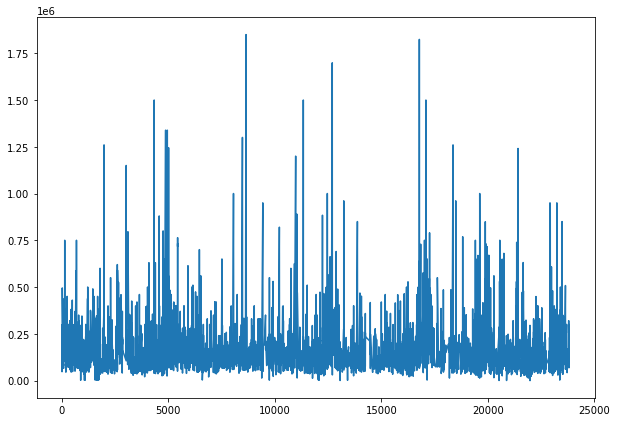

In [10]:
# Plotting apartment prices
data['price'].plot(figsize=(10,7))

<AxesSubplot:>

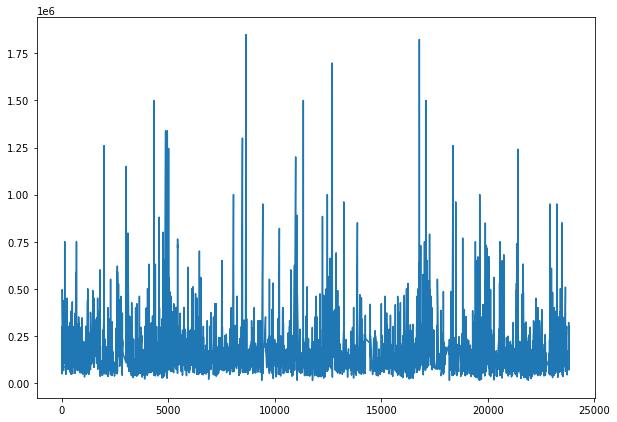

In [11]:
# Assuming that the price of less than 10,000€ is unreasonably low, keep only the apartments that have a higher selling price
price_filter = data['price'] > 10000
data = data[price_filter]
data['price'].plot(figsize=(10,7))

In [12]:
# Converting 'da/ne' to True/False
data['registration'] = data['registration'].replace({"Da": True, "Ne": False})
data['registration'] = pd.to_numeric(data['registration'])
data['parking'] = data['parking'].replace({"da": True, "ne": False})
data['parking'] = pd.to_numeric(data['parking'])
data['balcony'] = data['balcony'].replace({"da": True, "ne": False})
data['balcony'] = pd.to_numeric(data['balcony'])

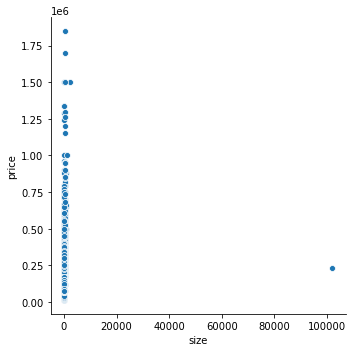

In [13]:
# Plotting price and size scatterplot
sns.relplot(x='size', y='price', data=data)

In [14]:
tmp = data.sort_values(by=['size'], ascending=False)
tmp.head()

,district,size,year,floor,registration,heating,rooms,bathrooms,parking,balcony,state,price
14112,Banovo brdo,102000.0,2020.0,2.0,True,Centralno,3.0,NaN,False,True,Novogradnja,235000
4332,Altina,2400.0,2005.0,0.0,False,Ostalo,9.0,NaN,False,False,Standardna gradnja,1500000
19613,Voždovac,1200.0,1997.0,NaN,False,Ostalo,20.0,NaN,True,False,Standardna gradnja,1000000
4566,Mali mokri lug,740.0,2005.0,0.0,True,Ostalo,5.0,NaN,False,False,Standardna gradnja,880000
19927,Voždovac,640.0,2014.0,8.0,True,Ostalo,5.0,1.0,False,True,Novogradnja,659000


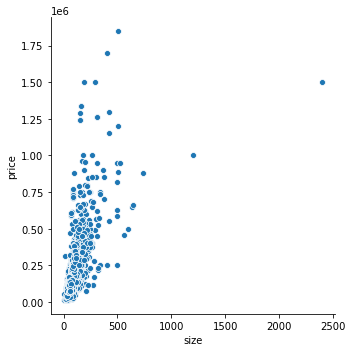

In [15]:
size_filter = data['size'] <= 2400
data = data[size_filter]
sns.relplot(x='size', y='price', data=data)

<AxesSubplot:>

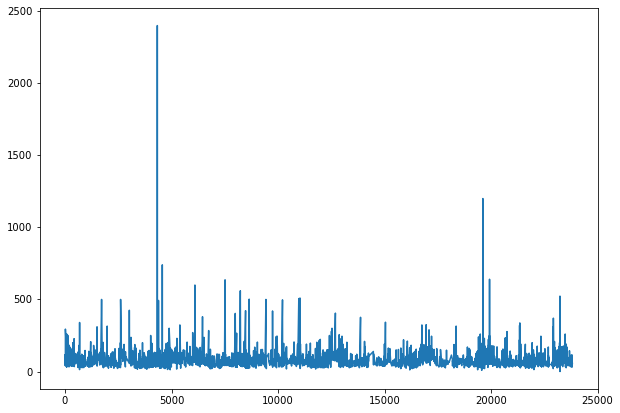

In [16]:
# Plotting apartment sizes
data['size'].plot(figsize=(10,7))

<AxesSubplot:>

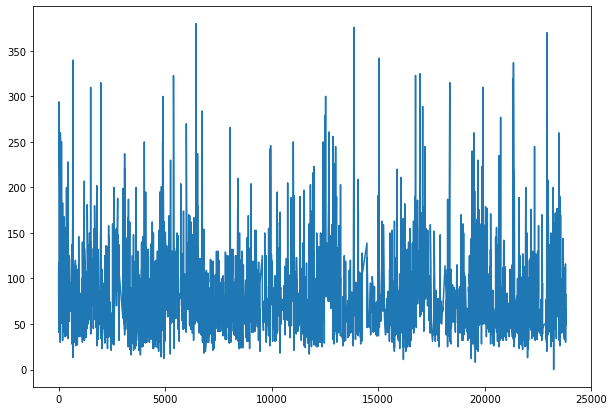

In [17]:
# Remove apartments where size is more than 400 square meters, as those are possible outliers (as seen above)
size_filter = data['size'] <= 400
data = data[size_filter]
data['size'].plot(figsize=(10,7))

In [18]:
# Checking for entries with construction year missing
data[data['year'].isna()]

,district,size,year,floor,registration,heating,rooms,bathrooms,parking,balcony,state,price
5,Vidikovac,41.0,NaN,NaN,True,Ostalo,1.0,NaN,False,True,Standardna gradnja,47000
10,Šumice,77.0,NaN,17.0,True,Centralno,3.0,NaN,True,True,Standardna gradnja,120000
48,Čukarica,198.0,NaN,NaN,True,Etažno,6.0,2.0,True,True,NaN,205000
63,Centar (uži),35.0,NaN,11.0,True,Centralno,1.0,NaN,False,False,Standardna gradnja,97000
66,Novi Beograd Blok 25 (Arena),73.0,NaN,4.0,True,Centralno,2.0,NaN,True,True,Standardna gradnja,149900
...,...,...,...,...,...,...,...,...,...,...,...,...
23795,Profesorska kolonija,30.0,NaN,1.0,True,TA peć,0.0,1.0,False,True,NaN,73000
23799,Novi Beograd Blok 23,50.0,NaN,NaN,True,Centralno,2.0,NaN,False,False,Standardna gradnja,115000
23800,Senjak,60.0,NaN,6.0,True,Centralno,2.0,NaN,False,True,Standardna gradnja,135000
23803,Šumice,67.0,NaN,5.0,True,Centralno,2.0,NaN,True,True,Standardna gradnja,122500


Missing count:  4346
Total count:  6260


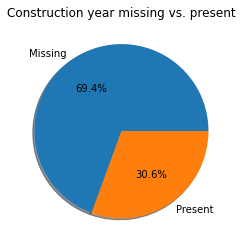

In [19]:
# Plotting missing:present year chart
missing_cnt = data['year'].isna().sum()
total_cnt = data.shape[0]
print('Missing count: ', missing_cnt)
print('Total count: ', total_cnt)

plt.pie([missing_cnt, (total_cnt - missing_cnt)], labels=['Missing', 'Present'], autopct='%1.1f%%', shadow=True)
plt.title('Construction year missing vs. present')
plt.show()

In [20]:
# Since nearly 70% of entries do not have construction year defined, dropping the entire column
data = data.drop(labels=['year'], axis=1)

In [21]:
# Checking for entries with floor attribute missing
data[data['floor'].isna()]

,district,size,floor,registration,heating,rooms,bathrooms,parking,balcony,state,price
3,Mali mokri lug,55.0,NaN,True,Ostalo,2.0,NaN,True,True,Standardna gradnja,69000
5,Vidikovac,41.0,NaN,True,Ostalo,1.0,NaN,False,True,Standardna gradnja,47000
48,Čukarica,198.0,NaN,True,Etažno,6.0,2.0,True,True,NaN,205000
77,Đeram pijaca,30.0,NaN,True,Ostalo,1.0,NaN,False,False,Standardna gradnja,65000
107,Dedinje (Beli dvor),207.0,NaN,True,"Etažno, Kamin, Klima",5.0,3.0,True,True,Novogradnja,438000
...,...,...,...,...,...,...,...,...,...,...,...
23668,Kalenić pijaca,41.0,NaN,True,Centralno,2.0,NaN,False,False,Standardna gradnja,115000
23718,Hadžipopovac,50.0,NaN,True,Centralno,2.0,NaN,False,False,Standardna gradnja,78000
23799,Novi Beograd Blok 23,50.0,NaN,True,Centralno,2.0,NaN,False,False,Standardna gradnja,115000
23811,Mirijevo I,50.0,NaN,False,Ostalo,2.0,NaN,False,True,Novogradnja,70000


In [22]:
# Updating missing floor values with mean
mean_floor = data['floor'].mean()
data['floor'] = data['floor'].fillna(math.floor(mean_floor))

In [23]:
# Checking for data with registration info missing
data[data['registration'].isna()]

,district,size,floor,registration,heating,rooms,bathrooms,parking,balcony,state,price


In [24]:
# Checking for entries with heating info missing
data[data['heating'].isna()]

,district,size,floor,registration,heating,rooms,bathrooms,parking,balcony,state,price
70,Neimar,37.0,4.0,True,NaN,1.0,NaN,True,True,Standardna gradnja,79000
188,Zemun (Bačka),116.0,2.0,True,NaN,5.0,NaN,False,True,Novogradnja,200000
192,Mirijevo I,58.0,3.0,True,NaN,3.0,1.0,False,False,Standardna gradnja,65000
193,Mirijevo I,57.0,3.0,True,NaN,3.0,1.0,False,False,Standardna gradnja,79900
303,Konjarnik,78.0,6.0,True,NaN,4.0,2.0,True,True,Novogradnja,121000
...,...,...,...,...,...,...,...,...,...,...,...
23612,Galenika,83.0,2.0,True,NaN,3.0,1.0,False,True,Standardna gradnja,85000
23639,Mali mokri lug,60.0,3.0,True,NaN,3.0,1.0,True,True,Novogradnja,60000
23716,Karaburma,52.0,2.0,True,NaN,2.0,NaN,False,False,Standardna gradnja,75000
23717,Krnjača,36.0,2.0,True,NaN,2.0,NaN,False,False,Standardna gradnja,42000


In [25]:
# Setting NaN heating types to most common type in that district

# indexes_to_replace = data[data['heating'].isna()].index
# heatings_by_district = data.groupby(['district', 'heating']).count()
# districts = data['district'].unique()
# max_heating_by_district = dict()
# for d in districts:
#     try:
#         max_heating = heatings_by_district.loc[d][heatings_by_district.loc[d]['price'] == heatings_by_district.loc[d]['price'].max()].index
#         max_heating_by_district[d] = max_heating[0]
#     except:
#         max_heating_by_district[d] = None
# for index in indexes_to_replace:
#     d = data.at[index, 'district']
#     data.at[index, 'heating'] = max_heating_by_district[d]

In [26]:
# Dropping the entries that do not have heating defined
data = data.dropna(axis=0, subset=['heating'])

In [27]:
# Checking for entries with room attribute missing
data[data['rooms'].isna()]

,district,size,floor,registration,heating,rooms,bathrooms,parking,balcony,state,price
367,Vračar (Centar),91.0,5.0,True,Etažno,NaN,1.0,False,False,Novogradnja,158000
369,Čukarica,200.0,4.0,True,Etažno,NaN,2.0,False,False,NaN,319000
372,Vračar (Centar),115.0,1.0,True,Centralno,NaN,2.0,False,True,Novogradnja,320000
376,Mirijevo I,43.0,4.0,True,Etažno,NaN,1.0,False,False,NaN,62350
377,Zemun (Meandri),114.0,5.0,True,Podno,NaN,2.0,True,True,Novogradnja,210900
379,Centar (uži),38.0,0.0,True,Etažno,NaN,1.0,False,False,NaN,68500
381,Centar (uži),84.0,2.0,True,Centralno,NaN,NaN,True,False,NaN,219000
877,Zemun (Save Kovačevića),27.0,0.0,True,Centralno,NaN,1.0,False,False,Kompletna rekonstrukcija,54600
879,Novi Beograd Blok 11 (Hotel Jugoslavija),110.0,2.0,True,Centralno,NaN,2.0,True,True,Delimična rekonstrukcija,253000
1088,Karađorđeva,80.0,1.0,True,Centralno,NaN,2.0,False,True,Izvorno stanje,153000


In [28]:
# Updating missing rooms values with mean
mean_rooms = data['rooms'].mean()
data['rooms'] = data['rooms'].fillna(math.floor(mean_rooms))

In [29]:
# Checking for entries with number of bathrooms missing
data[data['bathrooms'].isna()]

,district,size,floor,registration,heating,rooms,bathrooms,parking,balcony,state,price
1,Novi Beograd Blok 25 (Arena),81.0,7.0,True,Centralno,3.0,NaN,True,True,Standardna gradnja,177000
2,Novi Beograd Blok 11c (Stari Merkator),113.0,4.0,True,Centralno,4.0,NaN,False,True,Standardna gradnja,219000
3,Mali mokri lug,55.0,3.0,True,Ostalo,2.0,NaN,True,True,Standardna gradnja,69000
4,Savski venac,112.0,4.0,True,Centralno,4.0,NaN,False,False,Standardna gradnja,169000
5,Vidikovac,41.0,3.0,True,Ostalo,1.0,NaN,False,True,Standardna gradnja,47000
...,...,...,...,...,...,...,...,...,...,...,...
23810,Mirijevo I,49.0,1.0,False,Ostalo,2.0,NaN,False,True,Novogradnja,68600
23811,Mirijevo I,50.0,3.0,False,Ostalo,2.0,NaN,False,True,Novogradnja,70000
23812,Mirijevo I,56.0,3.0,False,Ostalo,3.0,NaN,False,True,Novogradnja,75600
23813,Mirijevo I,56.0,1.0,False,Ostalo,3.0,NaN,False,True,Novogradnja,78400


Missing count:  2869
Total count:  5876


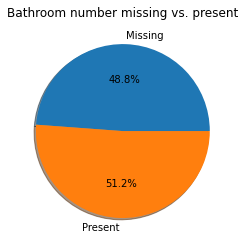

In [30]:
# Plotting missing:present bathrooms chart
missing_cnt = data['bathrooms'].isna().sum()
total_cnt = data.shape[0]
print('Missing count: ', missing_cnt)
print('Total count: ', total_cnt)

plt.pie([missing_cnt, (total_cnt - missing_cnt)], labels=['Missing', 'Present'], autopct='%1.1f%%', shadow=True)
plt.title('Bathroom number missing vs. present')
plt.show()

In [31]:
# Since nearly 50% of entries do not have number of bathrooms defined, dropping the entire column
data = data.drop(labels=['bathrooms'], axis=1)

In [32]:
data.head()

,district,size,floor,registration,heating,rooms,parking,balcony,state,price
1,Novi Beograd Blok 25 (Arena),81.0,7.0,True,Centralno,3.0,True,True,Standardna gradnja,177000
2,Novi Beograd Blok 11c (Stari Merkator),113.0,4.0,True,Centralno,4.0,False,True,Standardna gradnja,219000
3,Mali mokri lug,55.0,3.0,True,Ostalo,2.0,True,True,Standardna gradnja,69000
4,Savski venac,112.0,4.0,True,Centralno,4.0,False,False,Standardna gradnja,169000
5,Vidikovac,41.0,3.0,True,Ostalo,1.0,False,True,Standardna gradnja,47000


In [33]:
# Checking for entries with parking attribute missing
data[data['parking'].isna()]

,district,size,floor,registration,heating,rooms,parking,balcony,state,price


In [34]:
# Checking for entries with balcony attribute missing
data[data['balcony'].isna()]

,district,size,floor,registration,heating,rooms,parking,balcony,state,price


In [35]:
# Checking for entries with state attribute missing
data[data['state'].isna()]

,district,size,floor,registration,heating,rooms,parking,balcony,state,price
48,Čukarica,198.0,3.0,True,Etažno,6.0,True,True,NaN,205000
132,Centar (uži),250.0,2.0,True,Etažno,4.0,False,True,NaN,750000
310,Lion,105.0,3.0,True,Centralno,4.0,False,True,NaN,199000
366,Zemun (Kej),85.0,4.0,True,Etažno,3.0,True,False,NaN,149000
369,Čukarica,200.0,4.0,True,Etažno,2.0,False,False,NaN,319000
...,...,...,...,...,...,...,...,...,...,...
23596,Savski venac,99.0,1.0,True,Centralno,4.0,False,True,NaN,225000
23650,Voždovac,61.0,6.0,True,TA peć,3.0,False,False,NaN,89000
23788,Novi Beograd,65.0,3.0,True,Centralno,2.0,False,True,NaN,152000
23789,Vračar (Centar),115.0,1.0,True,Centralno,2.0,True,True,NaN,320000


In [36]:
# Dropping the entries that do not have state defined
data = data.dropna(axis=0, subset=['state'])

In [37]:
# Setting NaN states to most common type in that district

# indexes_to_replace = data[data['state'].isna()].index
# states_by_district = data.groupby(['district', 'state']).count()
# districts = data['district'].unique()
# max_state_by_district = dict()
# for d in districts:
#     max_state = states_by_district.loc[d][states_by_district.loc[d]['price'] == states_by_district.loc[d]['price'].max()].index
#     max_state_by_district[d] = max_state[0]
# for index in indexes_to_replace:
#     d = data.at[index, 'district']
#     data.at[index, 'state'] = max_state_by_district[d]

<AxesSubplot:>

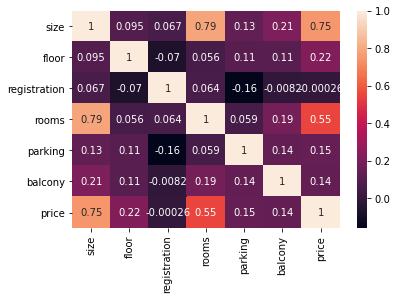

In [38]:
# Plotting the heatmap
sns.heatmap(data.corr(), annot=True)

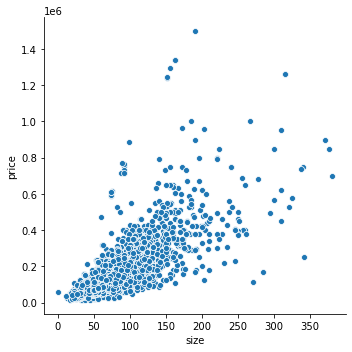

In [39]:
# Plotting price and size scatterplot
sns.relplot(x='size', y='price', data=data)

In [40]:
# Save preprocessed data to a new file
data.to_csv('../output/data/real_estate_preprocessed.csv')